In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

dados_bruto = pd.read_csv("/content/students_mental_health_survey.csv")

dados = dados_bruto.dropna()
dados.info()


import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service

###Para facilitiar a construção do código, criamos uma variável para cada coluna

In [ ]:

stress = "Stress_Level"
depre = "Depression_Score"
ansiedade = "Anxiety_Score"
social = "Social_Support"
sono = "Sleep_Quality"
diet = "Diet_Quality"
relac = "Relationship_Status"
subs = "Substance_Use"
creditos = "Semester_Credit_Load"
curso ="Course"
casa = "Residence_Type"
aconselhamento = "Counseling_Service_Use"
atvdd_fisica = 'Physical_Activity'
stress_f = "Financial_Stress"

###Trocamos a qualidade Low, Moderate, High para, respectivamente, 0,1,2 em algumas colunas.

In [ ]:
"""cont = 2

for x in dados[sono].unique():
  dados[sono] = dados[sono].replace(x, cont)
  cont -= 1

dados[sono].unique()


cont = 0

for x in dados[aconselhamento].unique():
  dados[aconselhamento] = dados[aconselhamento].replace(x, cont)
  cont += 1

dados[aconselhamento].unique()


cont = 0

for x in ['Low','Moderate','High']:
  dados[atvdd_fisica] = dados[atvdd_fisica].replace(x, cont)
  cont += 1

dados[atvdd_fisica].unique()

dados.head(10)"""

"cont = 2\n\nfor x in dados[sono].unique():\n  dados[sono] = dados[sono].replace(x, cont)\n  cont -= 1\n\ndados[sono].unique()\n\n\ncont = 0\n\nfor x in dados[aconselhamento].unique():\n  dados[aconselhamento] = dados[aconselhamento].replace(x, cont)\n  cont += 1\n\ndados[aconselhamento].unique()\n\n\ncont = 0\n\nfor x in ['Low','Moderate','High']:\n  dados[atvdd_fisica] = dados[atvdd_fisica].replace(x, cont)\n  cont += 1\n\ndados[atvdd_fisica].unique()\n\ndados.head(10)"

###Fase 4 - Agrupamento



**Por meio de vários testes com Kmeans, chegou a conclusão que, não existe nenhuma correlação forte o suficiente, ou seja, nenhum padrão foi detectado nos testes realizados. Logo, não existe perguntas realacionadas ao Kmeans.**

In [ ]:
dados.head(20)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
6,18,Law,Male,3.65,2,2,5,Good,Moderate,Average,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
7,21,Business,Female,3.40,0,3,3,Average,Low,Average,Low,Married,Never,Never,Yes,No,3,Moderate,23,On-Campus
8,24,Medical,Male,3.80,3,2,1,Poor,Low,Average,Moderate,Single,Frequently,Never,Yes,No,2,Low,28,On-Campus
12,22,Computer Science,Male,3.19,1,1,3,Average,Moderate,Average,Moderate,In a Relationship,Never,Occasionally,No,No,1,High,17,On-Campus
13,27,Medical,Male,3.26,3,2,2,Average,Moderate,Average,High,In a Relationship,Never,Occasionally,No,No,1,Moderate,17,With Family


<Axes: >

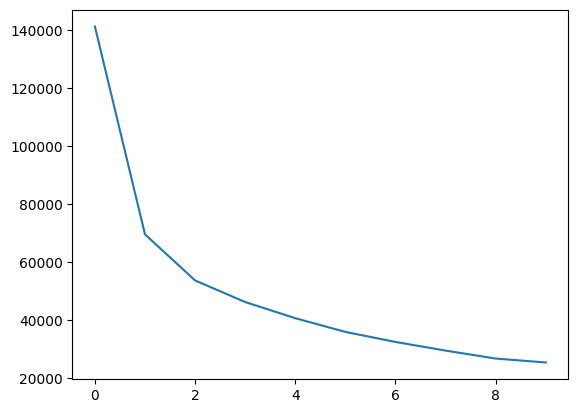

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto') #Mudar aqui o nuemrop de clusters
teste = dados[[stress,'Age','CGPA']] # Nomes das colunas para poder gerar o teste
kmeans.fit(teste)

lista=[]
for x in range(1,11):

  kmeans = KMeans(n_clusters = x, random_state = 0, n_init='auto')
  teste = dados[[stress,'Age',ansiedade]]
  kmeans.fit(teste)

  lista.append(kmeans.inertia_)

sns.lineplot(lista)




In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = teste.columns[0]),yaxis = dict(title  = teste.columns[1]),zaxis = dict(title  = teste.columns[2]))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = go.Scatter3d(x=teste[teste.columns[0]], y=teste[teste.columns[1]], z=teste[teste.columns[2]], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)

fig.show()

In [ ]:
geral2 = dados.groupby(casa)[stress_f].mean()

# Use groupby para agrupar por 'Course' e aplique a função mode para encontrar a moda de 'Stress e sono' em cada grupo
geralmoda= dados.groupby(casa)[stress_f].agg(lambda x: x.mode().iat[0])

print(geralmoda)

print(geral2)

Residence_Type
Off-Campus     0
On-Campus      0
With Family    1
Name: Financial_Stress, dtype: int64
Residence_Type
Off-Campus     2.453857
On-Campus      2.461319
With Family    2.437147
Name: Financial_Stress, dtype: float64
